Sources : https://analyticsindiamag.com/guide-to-multi-class-classification/

https://colab.research.google.com/drive/19dQTVjbjhKQoqVj0v4x34fNTpc0co5cf?usp=sharing#scrollTo=pZug4ZF56w5e

https://stackoverflow.com/questions/33547965/computing-auc-and-roc-curve-from-multi-class-data-in-scikit-learn-sklearn

https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

https://towardsdatascience.com/how-to-check-if-a-classification-model-is-overfitted-using-scikit-learn-148b6b19af8b

### Importing the data

2. [Extracting Median and EDA](#Extracting_Median_and_EDA)

3. [Extracting_Minimum](#Extracting_Minimum)

4. [Extracting_Maximum](#Extracting_Maximum)

5. [Extracting_Variance](#Extracting_Variance)

6. [Extracting_std](#Extracting_std)

7. [Extracting_ptp](#Extracting_ptp)

8. [Extracting_iqr](#Extracting_iqr)

9. [Stable_Flag_Classification](#Stable_Flag_Classification)

    9a. [Building_an_Logistic_Regression_classifier](#Building_an_Logistic_Regression_classifier)
    
    9b. [Building_a_RF_classifier](#Building_a_RF_classifier)
    
    9c. [Building_a_Decision_Tree_classifier](#Building_a_Decision_Tree_classifier)
    
    9d. [Building_a_SVM_classifier](#Building_a_SVM_classifier)
    
    9e. [Building_a_kNN_classifier](#Building_a_kNN_classifier)
    
    
10. [Classification_models_for_Cooler_failure](#Classification_models_for_Cooler_failure)

    10a. [Logistic regression using One vs All](#Logistic_regression_using_One_vs_All)
    
    10b. [SVM for cooler failure classification](#SVM_for_cooler_failure_classification.)
    
    10c. [DT_for_cooler_failure_classification](#DT_for_cooler_failure_classification.)
    
    10d. [kNN_for_cooler_failure_classification](#kNN_for_cooler_failure_classification.)
    
    10e. [RF_for_cooler_failure_classification](#RF_for_cooler_failure_classification.)

Inducing noise : https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#pip install PyWavelets

In [3]:
#pip install tsfel

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps1 = pd.read_csv('PS1.txt', delimiter = '\t', header = None)
df_ps2 = pd.read_csv('PS2.txt', delimiter = '\t', header = None)
df_ps3 = pd.read_csv('PS3.txt', delimiter = '\t', header = None)
df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs1 = pd.read_csv('FS1.txt', delimiter = '\t', header = None)
df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se

df_eps1 = pd.read_csv('EPS1.txt', delimiter = '\t', header = None)
df_se = pd.read_csv('SE.txt', delimiter = '\t', header = None)
df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:
# 
df_ps1.columns = col(6001,'ps1')
df_ps2.columns = col(6001,'ps2')
df_ps3.columns = col(6001,'ps3')
df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:
df_eps1.columns = col(6001,'eps1')

In [11]:
df_fs1.columns = col(601,'fs1')
df_fs2.columns = col(601,'fs2')

In [12]:
df_vs1.columns = col(61,'vs1')

In [13]:
df_ce.columns = col(61,'ce')

In [14]:
df_cp.columns = col(61,'cp')

In [15]:
df_se.columns = col(61,'se')

In [16]:
df_ps = pd.concat([df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs1, df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_eps1, df_se, df_vs1], axis = 1)


In [17]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


#### Checking for clustering tendency in each Sensor
#### Ideas for feature extraction and dimensionality reduction

1. **Sliding window of size 60 and follow it with statistical measures**  
2. **Use Python frameworks like tfresh and TSFEL**
3. **Rolling window of size 60 and follow it with PCA. Use this article for reference : https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/**


In [18]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [19]:
#!pip install tsfel

In [24]:
Final = pd.concat([df, profile], axis = 1)
Final['Cycle'] = np.arange(len(Final))
Final.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_57,vs1_58,vs1_59,vs1_60,Cooler Condition,Valve Condition,Internal Pump Leakage,Hydraulic Accumulator,Stable Flag,Cycle
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.544,0.545,0.535,0.543,3,100,0,130,1,0
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.540,0.533,0.531,0.534,3,100,0,130,1,1
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.545,0.544,0.530,0.534,3,100,0,130,1,2
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.544,0.543,0.543,0.542,3,100,0,130,1,3
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.549,0.542,0.533,0.537,3,100,0,130,1,4


# Statistical features

<a id = 'Extracting_Median_and_EDA'></a>

## Extracting Median

In [20]:
def median_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.median(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [21]:
PS1_median = pd.DataFrame(median_conversion(df_ps1))
PS1_median.columns = ['PS1_median']

PS2_median = pd.DataFrame(median_conversion(df_ps2))
PS2_median.columns = ['PS2_median']

PS3_median = pd.DataFrame(median_conversion(df_ps3))
PS3_median.columns = ['PS3_median']

PS4_median = pd.DataFrame(median_conversion(df_ps4))
PS4_median.columns = ['PS4_median']

PS5_median = pd.DataFrame(median_conversion(df_ps5))
PS5_median.columns = ['PS5_median']

PS6_median = pd.DataFrame(median_conversion(df_ps6))
PS6_median.columns = ['PS6_median']

TS1_median = pd.DataFrame(median_conversion(df_ts1))
TS1_median.columns = ['TS1_median']

TS2_median = pd.DataFrame(median_conversion(df_ts2))
TS2_median.columns = ['TS2_median']

TS3_median = pd.DataFrame(median_conversion(df_ts3))
TS3_median.columns = ['TS3_median']

TS4_median = pd.DataFrame(median_conversion(df_ts4))
TS4_median.columns = ['TS4_median']

FS1_median = pd.DataFrame(median_conversion(df_fs1))
FS1_median.columns = ['FS1_median']

FS2_median = pd.DataFrame(median_conversion(df_fs2))
FS2_median.columns = ['FS2_median']

P1_median = pd.DataFrame(median_conversion(df_eps1))
P1_median.columns = ['P1_median']

VS1_median = pd.DataFrame(median_conversion(df_vs1))
VS1_median.columns = ['VS1_median']

CE1_median = pd.DataFrame(median_conversion(df_ce))
CE1_median.columns = ['CE1_median']

CP1_median = pd.DataFrame(median_conversion(df_cp))
CP1_median.columns = ['CP1_median']

SE1_median = pd.DataFrame(median_conversion(df_se))
SE1_median.columns = ['SE1_median']

In [22]:
Median = pd.concat([PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,
                    TS1_median,TS2_median,TS3_median,TS4_median,FS1_median,FS2_median,
                    P1_median,VS1_median,CE1_median,CP1_median,SE1_median],axis = 1)

<a id = 'Extracting_Variance'></a>

## Extracting Variance

In [23]:
def var_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.var(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [24]:
PS1_var = pd.DataFrame(var_conversion(df_ps1))
PS1_var.columns = ['PS1_var']

PS2_var = pd.DataFrame(var_conversion(df_ps2))
PS2_var.columns = ['PS2_var']

PS3_var = pd.DataFrame(var_conversion(df_ps3))
PS3_var.columns = ['PS3_var']

PS4_var = pd.DataFrame(var_conversion(df_ps4))
PS4_var.columns = ['PS4_var']

PS5_var = pd.DataFrame(var_conversion(df_ps5))
PS5_var.columns = ['PS5_var']

PS6_var = pd.DataFrame(var_conversion(df_ps6))
PS6_var.columns = ['PS6_var']

TS1_var = pd.DataFrame(var_conversion(df_ts1))
TS1_var.columns = ['TS1_var']

TS2_var = pd.DataFrame(var_conversion(df_ts2))
TS2_var.columns = ['TS2_var']

TS3_var = pd.DataFrame(var_conversion(df_ts3))
TS3_var.columns = ['TS3_var']

TS4_var = pd.DataFrame(var_conversion(df_ts4))
TS4_var.columns = ['TS4_var']

FS1_var = pd.DataFrame(var_conversion(df_fs1))
FS1_var.columns = ['FS1_var']

FS2_var = pd.DataFrame(var_conversion(df_fs2))
FS2_var.columns = ['FS2_var']

P1_var = pd.DataFrame(var_conversion(df_eps1))
P1_var.columns = ['P1_var']

VS1_var = pd.DataFrame(var_conversion(df_vs1))
VS1_var.columns = ['VS1_var']

CE1_var = pd.DataFrame(var_conversion(df_ce))
CE1_var.columns = ['CE1_var']

CP1_var = pd.DataFrame(var_conversion(df_cp))
CP1_var.columns = ['CP1_var']

SE1_var = pd.DataFrame(var_conversion(df_se))
SE1_var.columns = ['SE1_var']

Var = pd.concat([PS1_var,PS2_var,PS3_var,PS4_var,PS5_var,PS6_var,
                 TS1_var,TS2_var,TS3_var,TS4_var,FS1_var,FS2_var,P1_var,VS1_var,CE1_var,CP1_var,SE1_var],axis = 1)


<a id = 'Extracting_std'></a>

## Extracting Standard Deviation

In [25]:
def std_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.std(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [26]:
PS1_std = pd.DataFrame(std_conversion(df_ps1))
PS1_std.columns = ['PS1_std']

PS2_std = pd.DataFrame(std_conversion(df_ps2))
PS2_std.columns = ['PS2_std']

PS3_std = pd.DataFrame(std_conversion(df_ps3))
PS3_std.columns = ['PS3_std']

PS4_std = pd.DataFrame(std_conversion(df_ps4))
PS4_std.columns = ['PS4_std']

PS5_std = pd.DataFrame(std_conversion(df_ps5))
PS5_std.columns = ['PS5_std']

PS6_std = pd.DataFrame(std_conversion(df_ps6))
PS6_std.columns = ['PS6_std']

TS1_std = pd.DataFrame(std_conversion(df_ts1))
TS1_std.columns = ['TS1_std']

TS2_std = pd.DataFrame(std_conversion(df_ts2))
TS2_std.columns = ['TS2_std']

TS3_std = pd.DataFrame(std_conversion(df_ts3))
TS3_std.columns = ['TS3_std']

TS4_std = pd.DataFrame(std_conversion(df_ts4))
TS4_std.columns = ['TS4_std']

FS1_std = pd.DataFrame(std_conversion(df_fs1))
FS1_std.columns = ['FS1_std']

FS2_std = pd.DataFrame(std_conversion(df_fs2))
FS2_std.columns = ['FS2_std']

P1_std = pd.DataFrame(std_conversion(df_eps1))
P1_std.columns = ['P1_std']

VS1_std = pd.DataFrame(std_conversion(df_vs1))
VS1_std.columns = ['VS1_std']

CE1_std = pd.DataFrame(std_conversion(df_ce))
CE1_std.columns = ['CE1_std']

CP1_std = pd.DataFrame(std_conversion(df_cp))
CP1_std.columns = ['CP1_std']

SE1_std = pd.DataFrame(std_conversion(df_se))
SE1_std.columns = ['SE1_std']

Std = pd.concat([PS1_std,PS2_std,PS3_std,PS4_std,PS5_std,PS6_std,TS1_std,TS2_std,TS3_std,TS4_std,
                 FS1_std,FS2_std,P1_std,VS1_std,CE1_std,CP1_std,SE1_std],axis = 1)


<a id = 'Extracting_ptp'></a>

## Extracting Peak to Peak

In [27]:
def ptp_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.max(axis=1)-df.min(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [28]:
PS1_ptp = pd.DataFrame(ptp_conversion(df_ps1))
PS1_ptp.columns = ['PS1_ptp']

PS2_ptp = pd.DataFrame(ptp_conversion(df_ps2))
PS2_ptp.columns = ['PS2_ptp']

PS3_ptp = pd.DataFrame(ptp_conversion(df_ps3))
PS3_ptp.columns = ['PS3_ptp']

PS4_ptp = pd.DataFrame(ptp_conversion(df_ps4))
PS4_ptp.columns = ['PS4_ptp']

PS5_ptp = pd.DataFrame(ptp_conversion(df_ps5))
PS5_ptp.columns = ['PS5_ptp']

PS6_ptp = pd.DataFrame(ptp_conversion(df_ps6))
PS6_ptp.columns = ['PS6_ptp']

TS1_ptp = pd.DataFrame(ptp_conversion(df_ts1))
TS1_ptp.columns = ['TS1_ptp']

TS2_ptp = pd.DataFrame(ptp_conversion(df_ts2))
TS2_ptp.columns = ['TS2_ptp']

TS3_ptp = pd.DataFrame(ptp_conversion(df_ts3))
TS3_ptp.columns = ['TS3_ptp']

TS4_ptp = pd.DataFrame(ptp_conversion(df_ts4))
TS4_ptp.columns = ['TS4_ptp']

FS1_ptp = pd.DataFrame(ptp_conversion(df_fs1))
FS1_ptp.columns = ['FS1_ptp']

FS2_ptp = pd.DataFrame(ptp_conversion(df_fs2))
FS2_ptp.columns = ['FS2_ptp']

P1_ptp = pd.DataFrame(ptp_conversion(df_eps1))
P1_ptp.columns = ['P1_ptp']

VS1_ptp = pd.DataFrame(ptp_conversion(df_vs1))
VS1_ptp.columns = ['VS1_ptp']

CE1_ptp = pd.DataFrame(ptp_conversion(df_ce))
CE1_ptp.columns = ['CE1_ptp']

CP1_ptp = pd.DataFrame(ptp_conversion(df_cp))
CP1_ptp.columns = ['CP1_ptp']

SE1_ptp = pd.DataFrame(ptp_conversion(df_se))
SE1_ptp.columns = ['SE1_ptp']

Ptp = pd.concat([PS1_ptp,PS2_ptp,PS3_ptp,PS4_ptp,PS5_ptp,PS6_ptp,TS1_ptp,TS2_ptp,TS3_ptp,TS4_ptp,
                 FS1_ptp,FS2_ptp,P1_ptp,VS1_ptp,CE1_ptp,CP1_ptp,SE1_ptp],axis = 1)


In [29]:
statsfinal = pd.concat([Median, Std, Var, Ptp], axis = 1)

In [30]:
statsfinal.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_ptp,TS3_ptp,TS4_ptp,FS1_ptp,FS2_ptp,P1_ptp,VS1_ptp,CE1_ptp,CP1_ptp,SE1_ptp
0,156.25,129.365,2.297,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,...,0.477,0.297,3.231,18.710,0.298,611.8,0.092,18.572,0.805,79.568
1,156.06,129.385,2.273,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,...,1.074,0.586,1.500,18.712,0.101,615.4,0.102,5.888,0.267,80.441
2,155.72,129.325,2.273,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,...,1.207,0.828,1.043,18.698,0.147,621.2,0.133,2.334,0.083,80.824
3,155.56,128.865,2.242,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,...,1.183,0.911,0.883,18.896,0.141,618.8,0.118,1.892,0.085,80.930
4,155.34,129.000,2.219,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,...,1.145,0.918,0.789,18.876,0.133,622.0,0.136,1.327,0.090,81.100


<a id = 'Extracting_iqr'></a>

## Extracting Interquartile Range

In [29]:
def iqr_conversion(df):
    df1 = pd.DataFrame()
    q3, q1 = np.percentile(df, [75 ,25])
    iqr = q3 - q1
    df1 = df.max(axis=1)-df.min(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [30]:
PS1_iqr = pd.DataFrame(iqr_conversion(df_ps1))
PS1_iqr.columns = ['PS1_iqr']

PS2_iqr = pd.DataFrame(iqr_conversion(df_ps2))
PS2_iqr.columns = ['PS2_iqr']

PS3_iqr = pd.DataFrame(iqr_conversion(df_ps3))
PS3_iqr.columns = ['PS3_iqr']

PS4_iqr = pd.DataFrame(iqr_conversion(df_ps4))
PS4_iqr.columns = ['PS4_iqr']

PS5_iqr = pd.DataFrame(iqr_conversion(df_ps5))
PS5_iqr.columns = ['PS5_iqr']

PS6_iqr = pd.DataFrame(iqr_conversion(df_ps6))
PS6_iqr.columns = ['PS6_iqr']

TS1_iqr = pd.DataFrame(iqr_conversion(df_ts1))
TS1_iqr.columns = ['TS1_iqr']

TS2_iqr = pd.DataFrame(iqr_conversion(df_ts2))
TS2_iqr.columns = ['TS2_iqr']

TS3_iqr = pd.DataFrame(iqr_conversion(df_ts3))
TS3_iqr.columns = ['TS3_iqr']

TS4_iqr = pd.DataFrame(iqr_conversion(df_ts4))
TS4_iqr.columns = ['TS4_iqr']

FS1_iqr = pd.DataFrame(iqr_conversion(df_fs1))
FS1_iqr.columns = ['FS1_iqr']

FS2_iqr = pd.DataFrame(iqr_conversion(df_fs2))
FS2_iqr.columns = ['FS2_iqr']

P1_iqr = pd.DataFrame(iqr_conversion(df_eps1))
P1_iqr.columns = ['P1_iqr']

VS1_iqr = pd.DataFrame(iqr_conversion(df_vs1))
VS1_iqr.columns = ['VS1_iqr']

CE1_iqr = pd.DataFrame(iqr_conversion(df_ce))
CE1_iqr.columns = ['CE1_iqr']

CP1_iqr = pd.DataFrame(iqr_conversion(df_cp))
CP1_iqr.columns = ['CP1_iqr']

SE1_iqr = pd.DataFrame(iqr_conversion(df_se))
SE1_iqr.columns = ['SE1_iqr']

Iqr = pd.concat([PS1_iqr,PS2_iqr,PS3_iqr,PS4_iqr,PS5_iqr,PS6_iqr,
                 TS1_iqr,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr],axis = 1)


### Extracting Skewness 

In [32]:
def skew_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.skew(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [ ]:
PS1_iqr = pd.DataFrame(skew_conversion(df_ps1))
PS1_iqr.columns = ['PS1_skew']

PS2_iqr = pd.DataFrame(skew_conversion(df_ps2))
PS2_iqr.columns = ['PS2_skew']

PS3_iqr = pd.DataFrame(skew_conversion(df_ps3))
PS3_iqr.columns = ['PS3_skew']

PS4_iqr = pd.DataFrame(skew_conversion(df_ps4))
PS4_iqr.columns = ['PS4_skew']

PS5_iqr = pd.DataFrame(skew_conversion(df_ps5))
PS5_iqr.columns = ['PS5_skew']

PS6_iqr = pd.DataFrame(skew_conversion(df_ps6))
PS6_iqr.columns = ['PS6_skew']

TS1_iqr = pd.DataFrame(skew_conversion(df_ts1))
TS1_iqr.columns = ['TS1_skew']

TS2_iqr = pd.DataFrame(skew_conversion(df_ts2))
TS2_iqr.columns = ['TS2_skew']

TS3_iqr = pd.DataFrame(skew_conversion(df_ts3))
TS3_iqr.columns = ['TS3_skew']

TS4_iqr = pd.DataFrame(skew_conversion(df_ts4))
TS4_iqr.columns = ['TS4_iqr']

FS1_iqr = pd.DataFrame(iqr_conversion(df_fs1))
FS1_iqr.columns = ['FS1_iqr']

FS2_iqr = pd.DataFrame(iqr_conversion(df_fs2))
FS2_iqr.columns = ['FS2_iqr']

P1_iqr = pd.DataFrame(iqr_conversion(df_eps1))
P1_iqr.columns = ['P1_iqr']

VS1_iqr = pd.DataFrame(iqr_conversion(df_vs1))
VS1_iqr.columns = ['VS1_iqr']

CE1_iqr = pd.DataFrame(iqr_conversion(df_ce))
CE1_iqr.columns = ['CE1_iqr']

CP1_iqr = pd.DataFrame(iqr_conversion(df_cp))
CP1_iqr.columns = ['CP1_iqr']

SE1_iqr = pd.DataFrame(iqr_conversion(df_se))
SE1_iqr.columns = ['SE1_iqr']

Iqr = pd.concat([PS1_iqr,PS2_iqr,PS3_iqr,PS4_iqr,PS5_iqr,PS6_iqr,
                 TS1_iqr,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr],axis = 1)


In [33]:
statsfinal = pd.concat([statsfinal, Iqr],axis = 1)

In [34]:
statsfinal.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
0,156.25,129.365,2.297,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,...,0.477,0.297,3.231,18.710,0.298,611.8,0.092,18.572,0.805,79.568
1,156.06,129.385,2.273,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,...,1.074,0.586,1.500,18.712,0.101,615.4,0.102,5.888,0.267,80.441
2,155.72,129.325,2.273,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,...,1.207,0.828,1.043,18.698,0.147,621.2,0.133,2.334,0.083,80.824
3,155.56,128.865,2.242,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,...,1.183,0.911,0.883,18.896,0.141,618.8,0.118,1.892,0.085,80.930
4,155.34,129.000,2.219,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,...,1.145,0.918,0.789,18.876,0.133,622.0,0.136,1.327,0.090,81.100


In [35]:
statsfinal_target = pd.concat([statsfinal,profile], axis = 1)

In [36]:
statsfinal.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
0,156.25,129.365,2.297,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,...,0.477,0.297,3.231,18.710,0.298,611.8,0.092,18.572,0.805,79.568
1,156.06,129.385,2.273,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,...,1.074,0.586,1.500,18.712,0.101,615.4,0.102,5.888,0.267,80.441
2,155.72,129.325,2.273,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,...,1.207,0.828,1.043,18.698,0.147,621.2,0.133,2.334,0.083,80.824
3,155.56,128.865,2.242,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,...,1.183,0.911,0.883,18.896,0.141,618.8,0.118,1.892,0.085,80.930
4,155.34,129.000,2.219,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,...,1.145,0.918,0.789,18.876,0.133,622.0,0.136,1.327,0.090,81.100


In [37]:
profile_stable = profile['Stable Flag']

<a id = 'Stable_Flag_Classification '></a>

# Stable Flag Classification



## Train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Splitting the data into train and test
SFX_train, SFX_test, SFy_train, SFy_test = train_test_split(statsfinal, profile_stable, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_stable)

Stratify is used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [40]:
SFy_traindf = pd.DataFrame(SFy_train)
SFy_testdf = pd.DataFrame(SFy_test)

print(SFy_train.value_counts())
print(SFy_test.value_counts())

0    1014
1     529
Name: Stable Flag, dtype: int64
0    435
1    227
Name: Stable Flag, dtype: int64


### Balancing the classes using SMOTE

In [41]:

## SMOTE method is used to balance data
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
SFX_train, SFy_train = smt.fit_sample(SFX_train,SFy_train)
SFX_train = pd.DataFrame(SFX_train, columns=SFX_train.columns)

#y_train_smt = pd.DataFrame(y_train_smt)

SFX_train.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
0,153.420,127.425,2.023,0.000,9.113,9.028,44.8630,49.8085,47.0040,40.428,...,0.343,0.254,0.043,20.479,0.092,640.0,0.107,0.776,0.072,78.338
1,156.440,130.160,2.305,0.641,9.934,9.814,35.6230,41.1700,38.4410,30.652,...,0.297,0.227,0.082,19.096,0.095,607.8,0.070,0.877,0.064,77.188
2,156.590,130.280,2.320,10.184,9.953,9.833,35.5000,41.0590,38.3590,30.551,...,0.184,0.262,0.129,19.709,0.098,613.0,0.095,0.873,0.065,77.488
3,153.995,124.880,1.719,0.000,8.405,8.356,57.2660,60.9370,58.7575,52.562,...,0.516,0.270,0.105,20.479,0.147,647.8,0.164,1.029,0.097,92.972
4,153.110,127.250,2.047,0.000,8.969,8.896,47.3085,52.3965,49.3670,42.742,...,0.274,0.282,0.098,19.858,0.108,646.6,0.176,1.203,0.101,79.361


## Standardisation of Data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler() ## x-mean/std

SFX_train_scaled = scaler.fit_transform(SFX_train)
SFX_test_scaled = scaler.transform(SFX_test)

In [44]:
SFX_train_scaled = pd.DataFrame(SFX_train_scaled)
SFX_test_scaled = pd.DataFrame(SFX_test_scaled)

In [45]:
SFX_train_scaled.columns = statsfinal.columns 
SFX_test_scaled.columns = statsfinal.columns 

In [46]:
print(SFX_test_scaled.shape)
print(SFX_train_scaled.shape)

(662, 85)
(2028, 85)


<a id = 'Building_an_Logistic_Regression_classifier'></a>

### Building an Logistic Regression classifier for Stable Flag

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

C:\Users\Admin\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [48]:
l_classifier = LogisticRegression(random_state=100, max_iter= 400)

In [49]:
l_classifier.fit(SFX_train_scaled,SFy_train)

LogisticRegression(max_iter=400, random_state=100)

In [50]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [51]:
evaluate_model(l_classifier, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

Train Precision : 93.76218323586744
Train Confusion Matrix:
[[950  64]
 [ 52 962]]
--------------------------------------------------
Test Precision : 90.09009009009009
Test Confusion Matrix:
[[413  22]
 [ 27 200]]


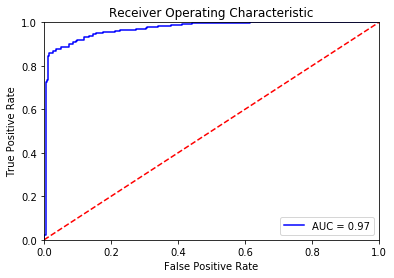

In [52]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = l_classifier.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Using RFE for dimension reduction

In [53]:
ml1=l_classifier.fit(SFX_train_scaled,SFy_train)
from sklearn.feature_selection import RFE
rfe = RFE(ml1, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(SFX_train_scaled, SFy_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [54]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True])

In [55]:
list(zip(SFX_train_scaled.columns, rfe.support_, rfe.ranking_))

[('PS1_median', True, 1),
 ('PS2_median', False, 2),
 ('PS3_median', True, 1),
 ('PS4_median', False, 8),
 ('PS5_median', False, 16),
 ('PS6_median', False, 11),
 ('TS1_median', False, 44),
 ('TS2_median', False, 6),
 ('TS3_median', False, 45),
 ('TS4_median', False, 55),
 ('FS1_median', False, 56),
 ('FS2_median', True, 1),
 ('P1_median', True, 1),
 ('VS1_median', True, 1),
 ('CE1_median', False, 7),
 ('CP1_median', True, 1),
 ('SE1_median', False, 54),
 ('PS1_std', False, 36),
 ('PS2_std', True, 1),
 ('PS3_std', False, 3),
 ('PS4_std', False, 65),
 ('PS5_std', False, 17),
 ('PS6_std', False, 10),
 ('TS1_std', False, 15),
 ('TS2_std', False, 47),
 ('TS3_std', False, 25),
 ('TS4_std', False, 14),
 ('FS1_std', True, 1),
 ('FS2_std', False, 9),
 ('P1_std', False, 35),
 ('VS1_std', False, 4),
 ('CE1_std', False, 13),
 ('CP1_std', False, 28),
 ('SE1_std', True, 1),
 ('PS1_var', False, 24),
 ('PS2_var', True, 1),
 ('PS3_var', True, 1),
 ('PS4_var', False, 52),
 ('PS5_var', False, 42),
 ('PS

In [56]:
rfecol = SFX_train_scaled.columns[rfe.support_] 
SFX_train_scaled.columns[~rfe.support_]


Index(['PS2_median', 'PS4_median', 'PS5_median', 'PS6_median', 'TS1_median',
       'TS2_median', 'TS3_median', 'TS4_median', 'FS1_median', 'CE1_median',
       'SE1_median', 'PS1_std', 'PS3_std', 'PS4_std', 'PS5_std', 'PS6_std',
       'TS1_std', 'TS2_std', 'TS3_std', 'TS4_std', 'FS2_std', 'P1_std',
       'VS1_std', 'CE1_std', 'CP1_std', 'PS1_var', 'PS4_var', 'PS5_var',
       'PS6_var', 'TS2_var', 'TS3_var', 'FS2_var', 'P1_var', 'VS1_var',
       'CE1_var', 'CP1_var', 'PS2_ptp', 'PS3_ptp', 'PS4_ptp', 'PS5_ptp',
       'PS6_ptp', 'TS1_ptp', 'TS2_ptp', 'TS3_ptp', 'TS4_ptp', 'FS1_ptp',
       'FS2_ptp', 'P1_ptp', 'VS1_ptp', 'CE1_ptp', 'CP1_ptp', 'PS1_iqr',
       'PS2_iqr', 'PS4_iqr', 'PS5_iqr', 'PS6_iqr', 'TS1_iqr', 'TS2_iqr',
       'TS3_iqr', 'TS4_iqr', 'FS2_iqr', 'P1_iqr', 'VS1_iqr', 'CE1_iqr',
       'CP1_iqr'],
      dtype='object')

In [57]:
SFX_train_scaledRFE = pd.DataFrame(SFX_train_scaled[rfecol])
SFX_test_scaledRFE = pd.DataFrame(SFX_test_scaled[rfecol])

In [58]:
l_classifier.fit(SFX_train_scaledRFE,SFy_train)

LogisticRegression(max_iter=400, random_state=100)

In [59]:
evaluate_model(l_classifier, SFy_train, SFX_train_scaledRFE, SFy_test, SFX_test_scaledRFE)

Train Precision : 92.23300970873787
Train Confusion Matrix:
[[934  80]
 [ 64 950]]
--------------------------------------------------
Test Precision : 86.19246861924687
Test Confusion Matrix:
[[402  33]
 [ 21 206]]


In [61]:
print(metrics.classification_report(SFy_test, l_classifier.predict(SFX_test_scaledRFE)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       435
           1       0.86      0.91      0.88       227

    accuracy                           0.92       662
   macro avg       0.91      0.92      0.91       662
weighted avg       0.92      0.92      0.92       662



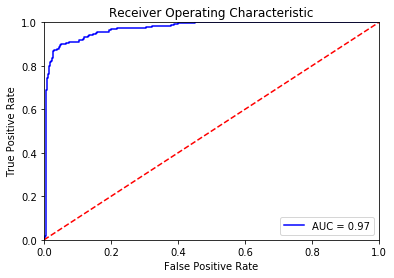

In [62]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = l_classifier.predict_proba(SFX_test_scaledRFE)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

### Performance on noisy test set

In [64]:
import numpy as np 
mu, sigma = 0, np.std(SFX_test_scaledRFE)*0.20
noise = np.random.normal(mu, sigma, SFX_test_scaledRFE.shape)
noise.shape

X_testnoise = SFX_test_scaledRFE + noise

In [67]:
print(metrics.classification_report(SFy_test, l_classifier.predict(X_testnoise)))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       435
           1       0.64      0.74      0.69       227

    accuracy                           0.77       662
   macro avg       0.74      0.76      0.75       662
weighted avg       0.78      0.77      0.77       662



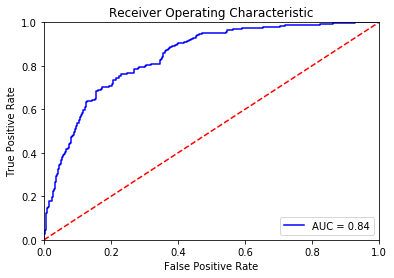

In [68]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = l_classifier.predict_proba(X_testnoise)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

1. Use Feature reduction using PCA
2. Use Feature reduction using other algorithms
3. Use balancing techniques

<a id = 'Building_a_RF_classifier'></a>

### Building an RF classifier for Stable Flag

In [69]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

In [70]:
rfc.fit(SFX_train_scaled,SFy_train)

RandomForestClassifier(random_state=42)

In [71]:
SFy_train_pred= rfc.predict(SFX_train_scaled)
SFy_test_pred= rfc.predict(SFX_test)

F1score_lr_train= f1_score(SFy_train,SFy_train_pred)
F1score_lr_test= f1_score(SFy_test,SFy_test_pred)

print("F1 score for train= ",round(F1score_lr_train,2))
print("F1 score for test= ",round(F1score_lr_test,2))

F1 score for train=  1.0
F1 score for test=  0.0


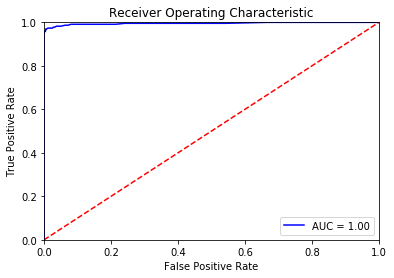

In [72]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Hypertune the parameters 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.tree import export_graphviz
#import pydotplus, graphviz
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [74]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1 , class_weight = 'balanced')

In [75]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [5,10,15,20,40,60],
    'n_estimators': [10, 30, 50, 100, 200]
}

## maximum depth is 1,2,5,10,20
## minimum sample leaf is 5,10,20,50,100
## maximum no. of features is 2,3,4
## no. of trees is 10, 30,50,100,200

In [76]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision")

In [77]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "precision")

In [78]:
%%time
grid_search.fit(SFX_train_scaled,SFy_train)

Fitting 4 folds for each of 750 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 10.8min finished


Wall time: 10min 47s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [5, 10, 15, 20, 40, 60],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='precision', verbose=1)

In [79]:
rf_best = grid_search.best_estimator_ ## best estimator is assigned to rf_best
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=5,
                       min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=42)

class_weight='balanced', max_depth=20, max_features=3,min_samples_leaf=5, n_jobs=-1, random_state=42

In [80]:
evaluate_model(rf_best, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

Train Precision : 100.0
Train Confusion Matrix:
[[1014    0]
 [  25  989]]
--------------------------------------------------
Test Precision : 100.0
Test Confusion Matrix:
[[435   0]
 [ 11 216]]


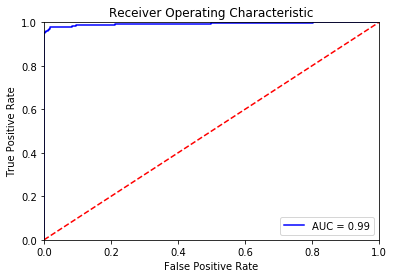

In [81]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_best.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(SFy_test, rf_best.predict(SFX_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       435
           1       1.00      0.95      0.98       227

    accuracy                           0.98       662
   macro avg       0.99      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



### Performance on noisy test set

In [155]:
import numpy as np 
mu, sigma = 0, np.std(SFX_test_scaled)*0.20
noise = np.random.normal(mu, sigma, SFX_test_scaled.shape)
noise.shape

X_testscaled_noise = SFX_test_scaled + noise

In [156]:
SFX_test_scaled.describe()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.070183,0.061026,-0.026103,0.157374,0.096653,0.096657,-0.096981,-0.101693,-0.095947,-0.098662,...,-0.099911,-0.013807,-0.100032,0.079361,-0.047231,-0.052765,-0.107364,-0.041824,-0.048940,-0.010937
std,1.064257,0.971501,1.071461,1.108767,1.004876,1.004760,1.005293,1.000066,1.007602,1.006574,...,0.976107,0.900370,0.573335,0.979762,0.968211,1.033343,0.849786,0.358502,0.491790,1.097450
min,-0.660675,-1.218725,-3.303602,-0.546029,-1.361607,-1.357178,-1.305561,-1.329326,-1.309379,-1.322102,...,-1.641814,-2.048311,-0.753339,-2.979098,-1.576490,-1.883087,-0.904108,-0.855459,-1.161961,-2.885627
25%,-0.376538,-0.374402,-0.023285,-0.546029,-0.959267,-0.961559,-1.199044,-1.192726,-1.194234,-1.226541,...,-0.823534,-0.648105,-0.371793,-0.464499,-0.710929,-1.169120,-0.555049,-0.289504,-0.360961,-0.599529
50%,-0.291091,-0.129649,0.140083,-0.546029,-0.023389,-0.025001,-0.127403,-0.124923,-0.127251,-0.098815,...,-0.268997,0.023040,-0.253474,0.608454,-0.326235,0.246914,-0.368763,-0.055055,-0.135680,-0.228292
75%,-0.055340,0.457606,0.645744,1.983827,1.226926,1.224660,1.005564,1.020895,0.992327,1.008302,...,0.381907,0.281959,0.050965,0.827533,0.298892,0.767515,-0.101091,0.154184,0.164695,0.186184
max,3.282236,11.194438,0.868754,2.019806,1.442527,1.448370,1.548850,1.545695,1.574221,1.513165,...,5.594215,9.017066,4.771765,0.827533,3.664963,5.208983,5.158307,1.758775,2.542663,3.894007


In [157]:
X_testscaled_noise.describe()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.065847,0.063359,-0.023627,0.164138,0.097828,0.093504,-0.104614,-0.107522,-0.099811,-0.099204,...,-0.089581,-0.023342,-0.097098,0.070694,-0.051383,-0.059257,-0.098216,-0.048011,-0.047234,-0.016161
std,1.093074,0.999993,1.090175,1.126303,1.022594,1.024676,1.015426,1.032529,1.030326,1.040309,...,1.007373,0.928845,0.589010,1.002646,0.986735,1.052279,0.863228,0.362447,0.495781,1.108301
min,-1.029359,-1.449057,-3.624412,-1.351225,-1.818632,-1.810511,-1.739103,-1.766558,-1.789737,-1.925862,...,-1.750572,-1.992009,-0.959582,-2.841955,-1.642828,-2.034439,-1.267890,-0.912548,-1.104623,-2.838042
25%,-0.431823,-0.428581,-0.103409,-0.613083,-0.878361,-0.856678,-1.124304,-1.168267,-1.140660,-1.192093,...,-0.825254,-0.598814,-0.419657,-0.500829,-0.721754,-1.161478,-0.546291,-0.296183,-0.349868,-0.674257
50%,-0.247907,-0.025485,0.215987,-0.395774,-0.058242,-0.015522,-0.114480,-0.134267,-0.076833,-0.069175,...,-0.280733,-0.051231,-0.232205,0.509924,-0.301234,0.202590,-0.333519,-0.061886,-0.124902,-0.259007
75%,-0.023073,0.472281,0.603040,1.668880,1.211210,1.178542,0.899202,0.878080,0.872887,0.920325,...,0.424406,0.294023,0.041211,0.816230,0.335029,0.792416,-0.067359,0.154141,0.180343,0.211135
max,3.738789,11.492707,1.448667,2.520448,1.876345,1.962137,1.981038,1.891635,1.893408,1.887679,...,5.838018,9.176674,4.860254,1.412431,3.567666,5.031786,5.182848,1.876655,2.638563,4.265098


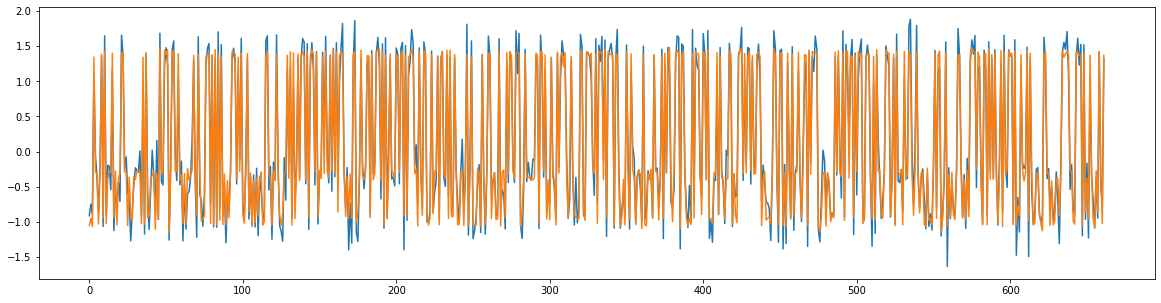

In [159]:
X_testscaled_noise['CE1_median'].T.plot(figsize = (20,5))
SFX_test_scaled['CE1_median'].T.plot(figsize = (20,5))

In [160]:
print(classification_report(SFy_test, rf_best.predict(X_testscaled_noise)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       435
           1       0.88      0.69      0.77       227

    accuracy                           0.86       662
   macro avg       0.87      0.82      0.84       662
weighted avg       0.86      0.86      0.86       662



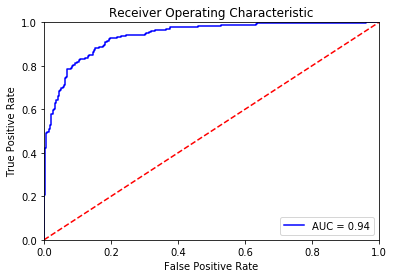

In [161]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_best.predict_proba(X_testscaled_noise)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Using randomsearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


In [ ]:
rf_random = RandomizedSearchCV(estimator = classifier_rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
%%time
rf_random.fit(SFX_train_scaled,SFy_train)

In [ ]:
rf_best_random = rf_random.best_estimator_

In [ ]:
rf_best_random

In [ ]:
evaluate_model(rf_best_random, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_best_random.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id = 'Building_a_Decision_Tree_classifier'></a>

### Building an Decision Tree classifier for Stable Flag

In [143]:
dtc = DecisionTreeClassifier(criterion="entropy",random_state=1)

In [144]:
dtc.fit(SFX_train_scaled,SFy_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [145]:
evaluate_model(dtc, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

Train Precision : 100.0
Train Confusion Matrix:
[[1014    0]
 [   0 1014]]
--------------------------------------------------
Test Precision : 92.64069264069265
Test Confusion Matrix:
[[418  17]
 [ 13 214]]


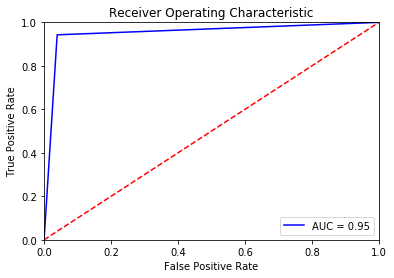

In [146]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dtc.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Hypertune The parameters

##### Using Gridsearch

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# depth of 2,3,5,10,20
## minimum samples in leaf is given as 5,10,20,50,100
## criterion is given as gini and entropy

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(SFX_train_scaled,SFy_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best = grid_search.best_estimator_ ## best estimator assigned to dt_best

In [ ]:
evaluate_model(dt_best, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_best.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Using Random search

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}


In [ ]:
tree_cv = RandomizedSearchCV(dtc, param_dist, cv=5)

In [ ]:
tree_cv.fit(SFX_train_scaled,SFy_train)

In [ ]:
tree_cv.best_estimator_

In [ ]:
dt_bestrandom = tree_cv.best_estimator_ ## best estimator assigned to dt_best

In [ ]:
evaluate_model(dt_bestrandom, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_bestrandom.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id = 'Building_a_SVM_classifier'></a>

### Building an SVM classifier for Stable Flag

In [ ]:
svc=SVC(kernel="rbf",probability=True)

In [ ]:
svc.fit(SFX_train_scaled,SFy_train)

In [ ]:
SFX_train_scaled.shape

In [ ]:
evaluate_model(svc, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svc.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id = 'Building_a_kNN_classifier'></a>

### Building a kNN classifier for Stable Flag

In [162]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)

In [163]:
knn.fit(SFX_train_scaled,SFy_train)

KNeighborsClassifier(n_neighbors=10)

In [164]:
evaluate_model(knn, SFy_train, SFX_train_scaled, SFy_test, SFX_test_scaled)

Train Precision : 94.69999999999999
Train Confusion Matrix:
[[961  53]
 [ 67 947]]
--------------------------------------------------
Test Precision : 92.66055045871559
Test Confusion Matrix:
[[419  16]
 [ 25 202]]


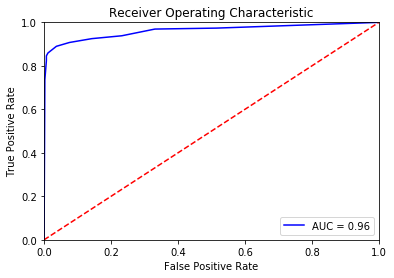

In [165]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(SFX_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Feature extraction using PCA

In [166]:
from sklearn.decomposition import PCA

In [167]:
pca = PCA(random_state=42)
SFX_train_pca = pca.fit(SFX_train_scaled)

In [168]:
pca.components_

array([[ 9.53740836e-02,  1.24228309e-04, -1.53867910e-01, ...,
         1.60791883e-02,  4.11640141e-02,  1.42765625e-01],
       [-6.06386247e-02, -2.88041187e-02,  5.92361861e-02, ...,
         2.12399581e-01,  1.97576437e-01, -4.59568049e-02],
       [ 2.14396511e-01,  1.69839710e-01, -1.13226002e-01, ...,
         5.93222049e-02,  4.63914249e-02,  1.14913890e-01],
       ...,
       [ 0.00000000e+00,  2.32040010e-18,  8.35579456e-16, ...,
        -2.26413290e-01, -1.18599210e-01,  1.04686564e-01],
       [ 0.00000000e+00, -2.99961688e-17,  1.47609139e-16, ...,
         4.84122087e-02,  4.74530773e-01, -4.95909161e-04],
       [ 0.00000000e+00, -3.54253191e-17,  6.89203662e-17, ...,
         5.22457032e-01, -3.22205668e-01,  1.68806746e-01]])

In [169]:
pca.explained_variance_ratio_

array([3.48443679e-01, 2.17919661e-01, 1.57541050e-01, 6.27619435e-02,
       4.16678560e-02, 3.32129843e-02, 2.33963545e-02, 2.05520798e-02,
       1.71470102e-02, 1.37977992e-02, 1.17588380e-02, 7.64229675e-03,
       6.21674648e-03, 5.82369098e-03, 4.66867066e-03, 3.85415224e-03,
       3.07079816e-03, 2.69796164e-03, 2.29368979e-03, 2.18593461e-03,
       1.69400662e-03, 1.39240453e-03, 1.34154559e-03, 1.13517304e-03,
       9.86024595e-04, 8.52728938e-04, 7.00834726e-04, 6.56336180e-04,
       6.07109635e-04, 5.20968531e-04, 4.52807771e-04, 4.15863345e-04,
       3.50779184e-04, 3.08708978e-04, 2.68004063e-04, 2.52763956e-04,
       2.34290520e-04, 2.23018237e-04, 1.68504401e-04, 1.38120315e-04,
       1.21147097e-04, 1.13659484e-04, 1.01623106e-04, 7.58639489e-05,
       6.32751782e-05, 3.66834483e-05, 3.13155007e-05, 2.68595604e-05,
       1.80529340e-05, 1.44258173e-05, 1.08130169e-05, 9.08788690e-06,
       7.70306092e-06, 4.16938507e-06, 3.37541503e-06, 2.27686970e-06,
      

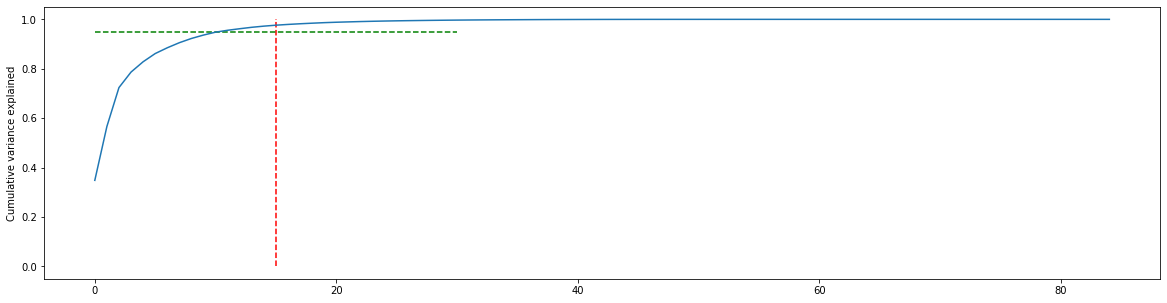

In [170]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [171]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)

SFX_train_pca = pca_final.fit_transform(SFX_train_scaled)
SFX_test_pca = pca_final.transform(SFX_test_scaled)


In [172]:
print(SFX_train_pca.shape)
print(SFX_test_pca.shape)

(2028, 17)
(662, 17)


#### Checking the performance of SVM + PCA

In [ ]:
svc.fit(SFX_train_pca,SFy_train)

In [ ]:
evaluate_model(svc, SFy_train, SFX_train_pca, SFy_test, SFX_test_pca)

In [ ]:
print(classification_report(SFy_test, svc.predict(SFX_test_pca)))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svc.predict_proba(SFX_test_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### kNN + PCA

In [173]:
knn.fit(SFX_train_pca,SFy_train)

KNeighborsClassifier(n_neighbors=10)

In [174]:
evaluate_model(knn, SFy_train, SFX_train_pca, SFy_test, SFX_test_pca)

Train Precision : 93.55797819623389
Train Confusion Matrix:
[[949  65]
 [ 70 944]]
--------------------------------------------------
Test Precision : 92.95774647887323
Test Confusion Matrix:
[[420  15]
 [ 29 198]]


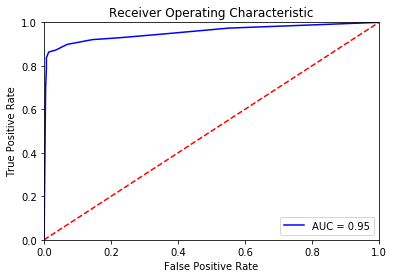

In [175]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(SFX_test_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Noise 

In [176]:
import numpy as np 
mu, sigma = 0, np.std(SFX_test_pca)*0.20
noise = np.random.normal(mu, sigma, SFX_test_pca.shape)
noise.shape

(662, 17)

In [177]:
X_testnoise = SFX_test_pca + noise

In [178]:
evaluate_model(knn, SFy_train, SFX_train_pca, SFy_test, X_testnoise)

Train Precision : 93.55797819623389
Train Confusion Matrix:
[[949  65]
 [ 70 944]]
--------------------------------------------------
Test Precision : 88.18181818181819
Test Confusion Matrix:
[[409  26]
 [ 33 194]]


In [ ]:
import numpy as np 
mu, sigma = 0, np.std(SFX_test_scaled)*0.20
noise = np.random.normal(mu, sigma, SFX_test_scaled.shape)
noise.shape

In [ ]:
X_test_scalednoise = SFX_test_scaled + noise

In [ ]:
print(classification_report(SFy_test, svc.predict(X_testnoise)))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svc.predict_proba(X_testnoise)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(SFy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()